### First, we have to import all the required modules such as numpy, pandas and matplotlib: 
1. numpy for performing vector and matrix operations, 
2. pandas for data analysis
3. matplotlib for data visualization
4. FontProperties: A class for storing and manipulating font properties.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter as formatter

In [74]:
from matplotlib.font_manager import FontProperties as Font
font = Font()
font.set_name('Arial')
%matplotlib inline

#### Experimental data written into a file named "potential.csv" with the columns named "volume of K2Cr2O7 (mL)" and "potential (mV)".
1. We load this file "potential.csv' into a pandas dataframe, which is like a excel sheet

In [75]:
df_pot=pd.read_csv("potential.csv")
df_pot # printing the dataframe

,volume of K2Cr2O7 (mL),potential (mV)
0,0.0,304
1,0.5,341
2,1.0,348
3,1.5,361
4,2.0,371
5,2.5,374
6,3.0,380
7,3.5,384
8,4.0,389
9,4.5,396


### Now we are ready to plot. So, we will first create a frame for plot with size 5 inches width and 5 inches height

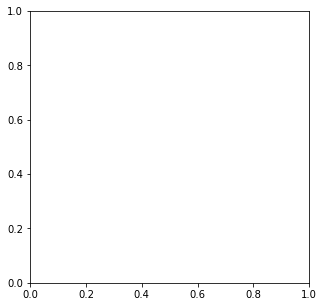

In [76]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))

### Define X and Y values before Plotting
1. Here x values represent "volume of K2Cr2O7 (mL)" and y values are "potential (mV)" values
2. Plot y versus x using ax.plot command

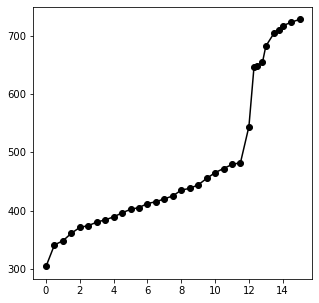

In [77]:
x=df_pot["volume of K2Cr2O7 (mL)"]
y=df_pot["potential (mV)"]
ax.plot(x,y,color="black",marker="o")
fig

### Axes limits and labels
1. Define the axes limits using set_xlim and set_ylim functions
2. label the axes using set_xlabel, set_ylabel functions

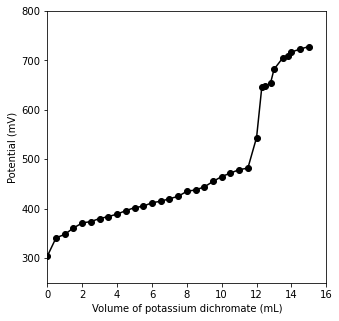

In [78]:
ax.set_xlim(0,16)
ax.set_ylim(250,800)
ax.set_xlabel('Volume of potassium dichromate (mL)')
ax.set_ylabel("Potential (mV)")
fig

### Number Formats and Minor Tick Labels
1. Next, we want to have 1 decimal place in the X-axis values and zero decimal places in the Y-axis values. For this purpose we use formatter function.
2. We would like to have minor tick lables in the plot. For this purpose, we use set_minor_locator function.

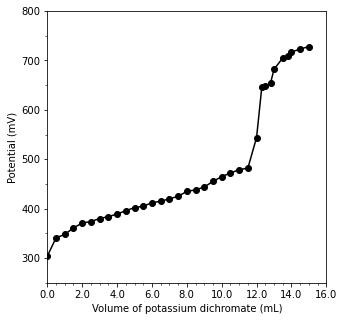

In [79]:
ax.xaxis.set_major_formatter(formatter('%.1f'))
ax.yaxis.set_major_formatter(formatter('%.0f'))

ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(50))
fig

### Figure layout and saving

In [80]:
fig.tight_layout()
fig.savefig('E.pdf',dpi=600)

### Now to find out end point, we would like to calculate change in potential (dE) with respect to change in volume (dV)
1. For calculating dE and dV we use np.diff() functions
2. Then we calculate dE/dV

In [81]:
dV=np.diff(x)
dE=np.diff(y)
dE_by_dV=(dE/dV).round(2)
dE_by_dV

array([ 74.  ,  14.  ,  26.  ,  20.  ,   6.  ,  12.  ,   8.  ,  10.  ,
        14.  ,  12.  ,   6.  ,  14.  ,   6.  ,  10.  ,  10.  ,  20.  ,
         6.  ,  12.  ,  22.  ,  20.  ,  14.  ,  14.  ,   6.  , 124.  ,
       340.  ,  10.  ,  20.  , 140.  ,  46.  ,  13.33,  40.  ,  12.  ,
        10.  ])

### Let us create a dataframe to store dV, dE and dE/dV values

In [82]:
df_dE=pd.DataFrame()
df_dE["V (mL)"]=df_pot["volume of K2Cr2O7 (mL)"][1:]
df_dE["dV (mL)"]=dV
df_dE["E (mV)"]=df_pot["potential (mV)"][1:]
df_dE["dE (mV)"]=dE
df_dE["dE_by_dV (mV/mL)"]=dE_by_dV
df_dE

,V (mL),dV (mL),E (mV),dE (mV),dE_by_dV (mV/mL)
1,0.5,0.5,341,37,74.00
2,1.0,0.5,348,7,14.00
3,1.5,0.5,361,13,26.00
4,2.0,0.5,371,10,20.00
5,2.5,0.5,374,3,6.00
6,3.0,0.5,380,6,12.00
7,3.5,0.5,384,4,8.00
8,4.0,0.5,389,5,10.00
9,4.5,0.5,396,7,14.00
10,5.0,0.5,402,6,12.00


### Finding the end point of the titration
1. Now, we would like to find out where dE/dV is maximum. 
2. The volume corresponding to it is the end point.

In [83]:
der_max=df_dE[df_dE["dE_by_dV (mV/mL)"]==df_dE["dE_by_dV (mV/mL)"].max()]
endpoint=der_max["V (mL)"]
endpoint=float(endpoint)
der_max
endpoint

12.3

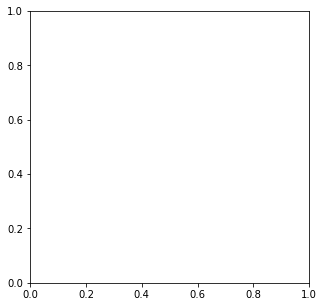

In [84]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))

### Plotting dE/dV versus volume of potassium dichromate

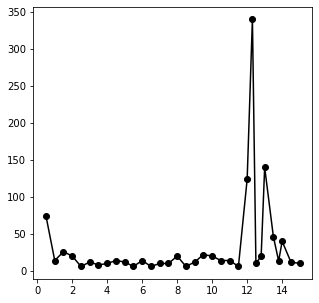

In [85]:
x1=df_dE["V (mL)"]
y1=df_dE["dE_by_dV (mV/mL)"]
ax.plot(x1,y1,color="black",marker="o")
fig

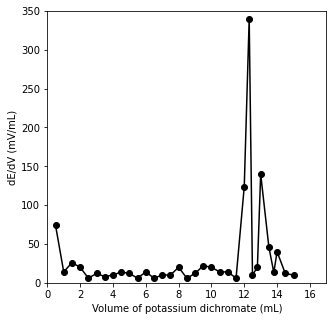

In [86]:
ax.set_xlim(0,17)
ax.set_ylim(0,350)
ax.set_xlabel('Volume of potassium dichromate (mL)')
ax.set_ylabel("dE/dV (mV/mL)")
fig

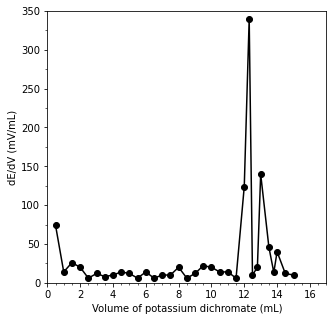

In [87]:
ax.xaxis.set_major_formatter(formatter('%.0f'))
ax.yaxis.set_major_formatter(formatter('%.0f'))

ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(25))
fig

In [88]:
fig.tight_layout()
fig.savefig('dE.pdf',dpi=600)